## SuperMario Frames Preprocessing

The environment returns frames of 240x256x3 size

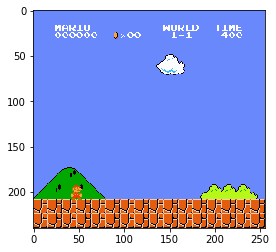

image rgb of size 240x256


In [2]:
import gym_super_mario_bros as gym
import matplotlib.pyplot as plt

env = gym.make('SuperMarioBros-v0')
state = env.reset()
plt.imshow(state)
plt.show()
print(f'image rgb of size {state.shape[0]}x{state.shape[1]}')

There a 8 levels with 4 stages 

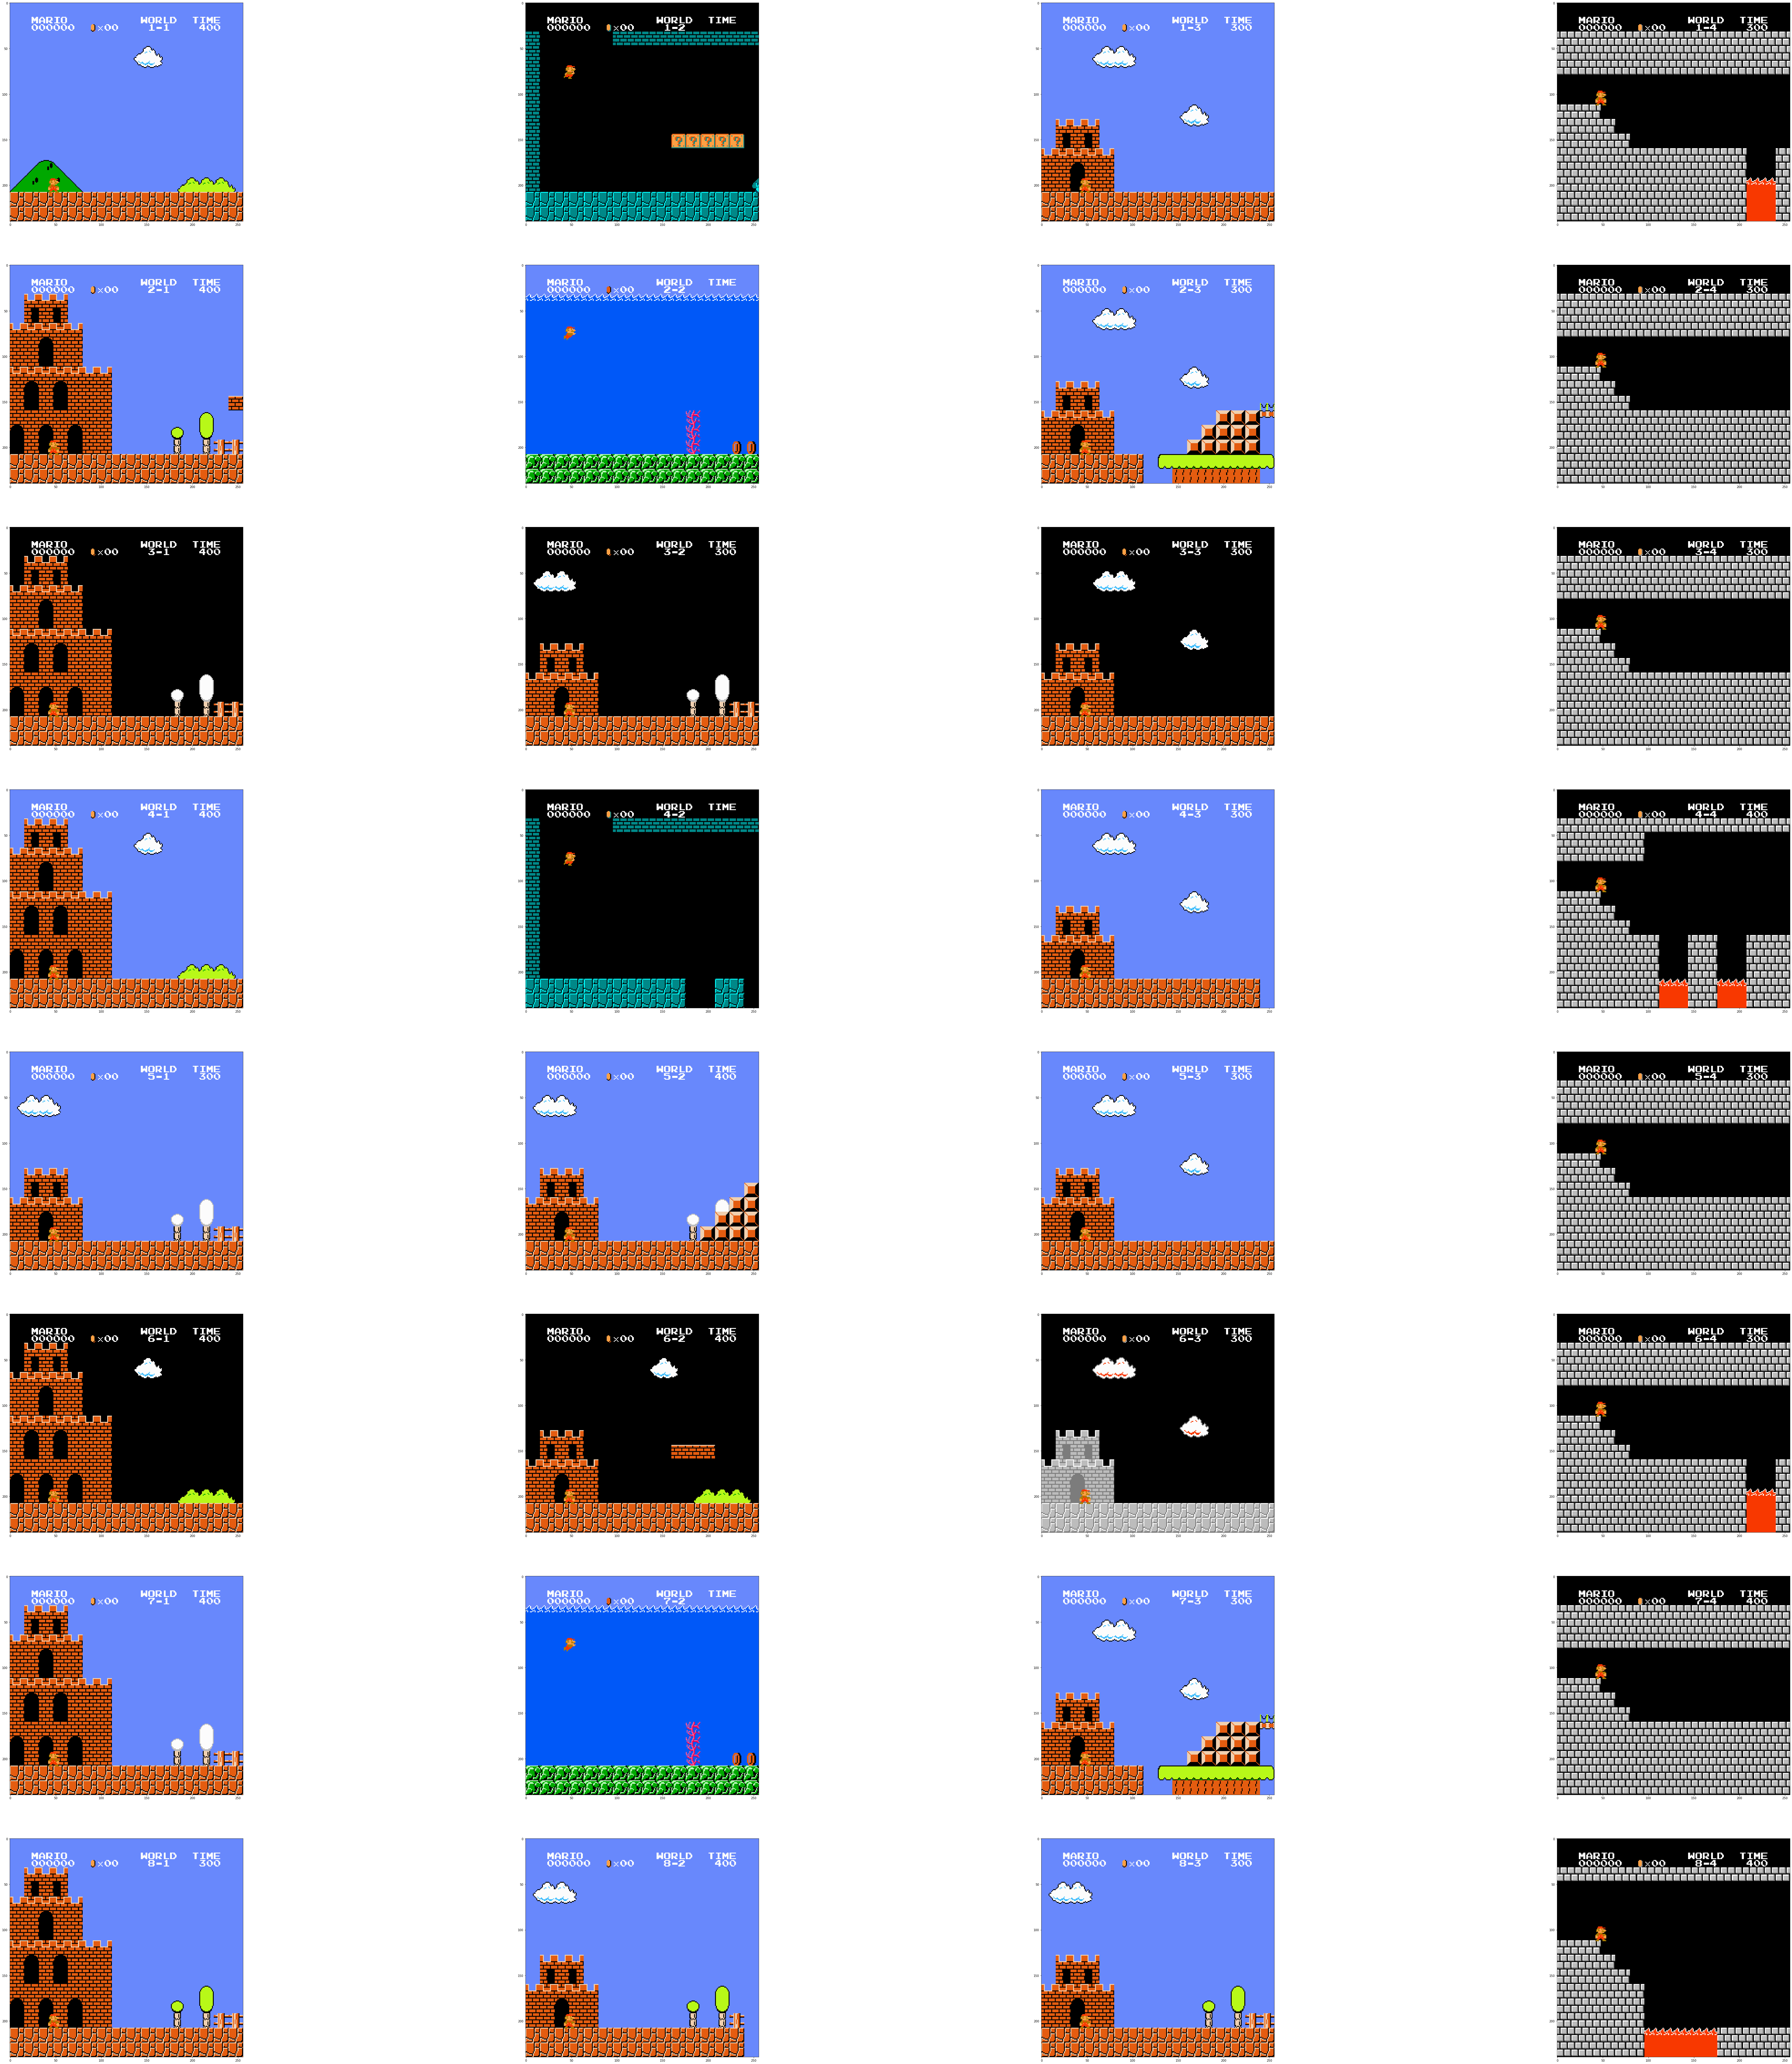

In [3]:
n_worlds = 8
n_stages = 4

i = 0
init_frames = []
fig = plt.figure(figsize=(120, 128))
for world in range(n_worlds):
    init_frames.append([])
    for stage in range(n_stages):
        i += 1
        env = gym.make(f'SuperMarioBros-{world + 1}-{stage + 1}-v0')
        init_frame = env.reset()
        init_frames[world].append(init_frame)
        plt.subplot(n_worlds, n_stages, i)
        plt.imshow(init_frame)

The idea is to highlight Mario, cut the top part of the frame and make background darker

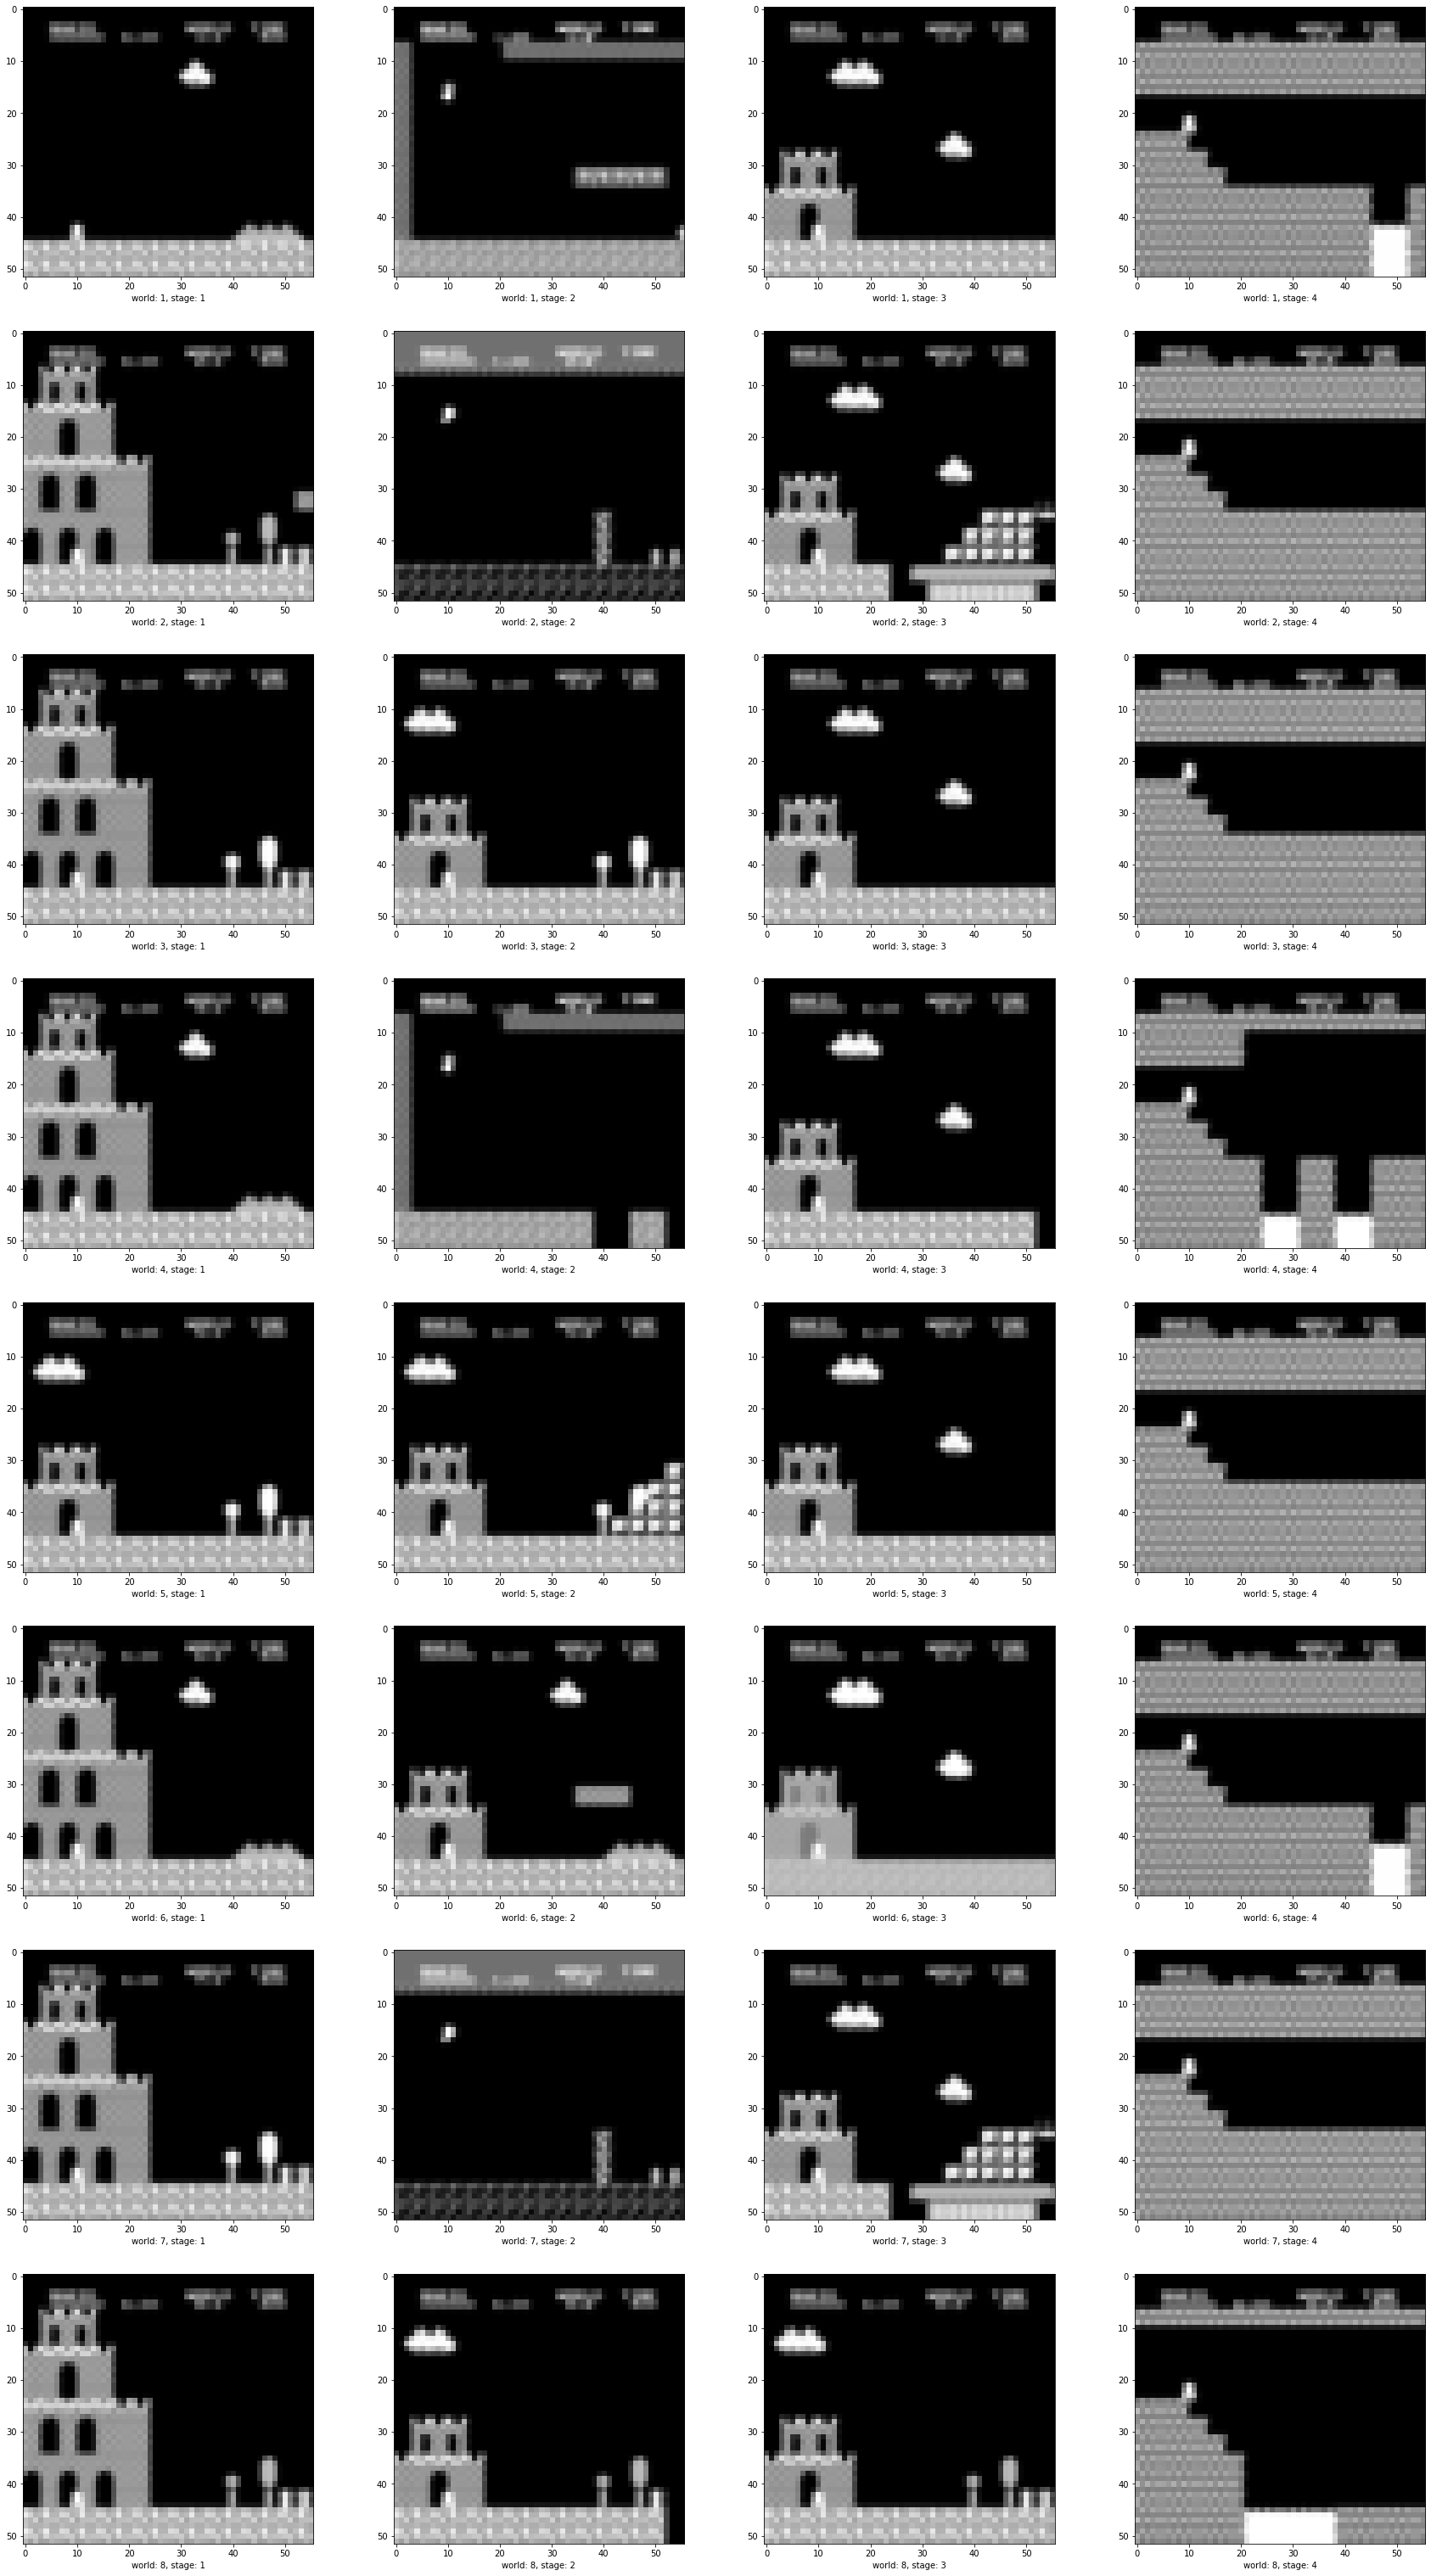

In [5]:
import torchvision
from supermario_dqn.preprocess import *
from torchvision import transforms
import numpy as np

fig = plt.figure(figsize=(30, 55))
i = 0
for world in range(n_worlds):
    for stage in range(n_stages):
        i += 1
        state = preprocess(world+1, stage+1, init_frames[world][stage], 52, 56)
        plt.subplot(n_worlds, n_stages, i)
        plt.imshow(state, cmap='gray')
        plt.xlabel(f'world: {world+1}, stage: {stage+1}')

Neural Network will be feeded with a 4x52x55 frame containing 4 frames

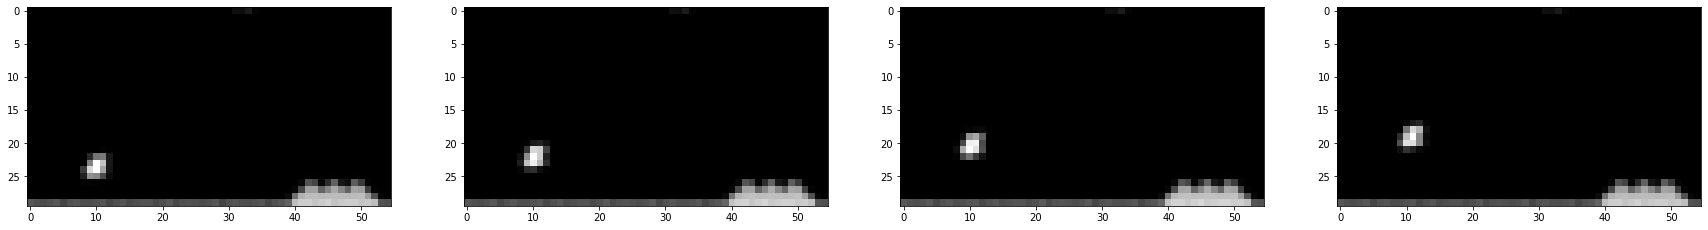

In [34]:
from collections import deque
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from nes_py.wrappers import JoypadSpace 

env = gym.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

env.reset()
action = 2

# init
for i in range(4):
    env.step(action)[0]
    
fig = plt.figure(figsize=(30, 56))
for i in range(4):
    state = None
    for j in range(2):
        state = env.step(action)[0]
        
    plt.subplot(1, 4, i+1)
    plt.imshow(preprocess(1, 1, state, 30, 56), cmap='gray')
    
plt.show()